In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
import datetime
import numpy as np

## Covid-19 time series

In [ ]:
! pip install COVID19Py

In [23]:
import COVID19Py
# https://pypi.org/project/COVID19Py/

# Python wrapper for covid-19 global data from jhu source
covid19 = COVID19Py.COVID19()

# latest global total confirmed, death and recover
# latest = covid19.getLatest()

# latest global data by country/region
locations_latest = covid19.getLocations() # returns a list of dictionary

# Time series of global data by country/region
locations = covid19.getLocations(timelines=True)

In [131]:
df_latest = pd.DataFrame()
df_latest['country'] = [location['country'] for location in locations]
df_latest['confirmed'] = [location['latest']['confirmed'] for location in locations_latest] 
df_latest['death'] = [location['latest']['deaths'] for location in locations_latest] 

# Top 10 countries for confirmed cases
df_latest = df_latest.sort_values('confirmed', ascending = False)
print('Top 10 countries for confirmed cases')
df_latest.head(10)

Top 10 countries for confirmed cases


,country,confirmed,death
225,US,213372,4757
137,Italy,110574,13155
201,Spain,104118,9387
120,Germany,77872,920
62,China,67802,3193
116,France,56989,4032
133,Iran,47593,3036
223,United Kingdom,29474,2352
206,Switzerland,17768,488
213,Turkey,15679,277


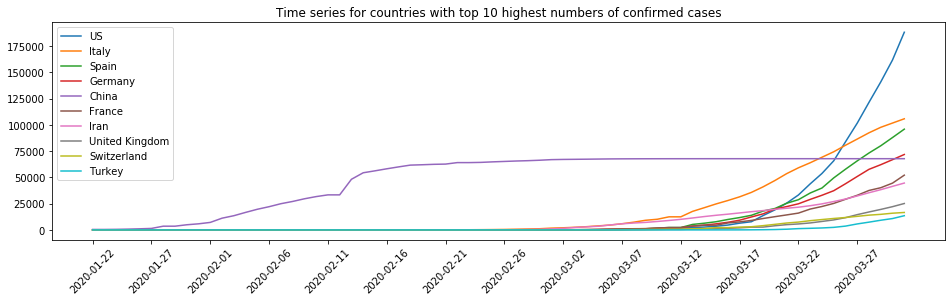

In [132]:
# Plot the timelines for those countries
top10_index = df_latest.head(10).index.values
plt.figure(figsize = [16,4])
for index in top10_index:
    country = str(df_latest.loc[df_latest.index == index]['country'].values[0])
    timeline = locations[index]['timelines']['confirmed']['timeline']
    list_ = sorted(timeline.items()) # sorted by key, return a list of tuples
    x, y = zip(*list_) # unpack a list of pairs into two tuples
    timestamps = []
    for xx in x:
        timestamps.append(xx.split('T')[0])# extract date but discard the time

    plt.plot(np.arange(len(timestamps)), y, label = country)
    plt.xticks(np.arange(0, len(timestamps),5), labels = np.array(timestamps)[np.arange(0, len(timestamps),5)], rotation = 45)

plt.legend()
plt.title('Time series for countries with top 10 highest numbers of confirmed cases')
plt.show()

## Scrape data from twitter API

In [136]:
import sys
import jsonpickle
import os
import tweepy
#import nltk
import pandas as pd
import json
from pandas.io.json import json_normalize
from datetime import datetime, timezone
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import time
import csv

In [73]:
## token from the new app
# https://developer.twitter.com/en/apps/17659761

# Tweets dataset
# https://ieee-dataport.org/open-access/corona-virus-covid-19-tweets-dataset

auth = tweepy.OAuthHandler('8bZGN36KQypZODEtjDEjjmrfk', 'tpOLjxzgd5Dx0AY5l0FMoQ80SXBxR2KyevUMm1xI9N8oOjxBuv')

auth.set_access_token('934846563825930241-R0AK0hXBX2kOTBwGuYGgKJGIC8xpLyS', 'inf0uWtHowaO7gppNZDT1P3zdwhJpiyRWnV6seP20O5lD')

api = tweepy.API(auth)

In [ ]:
date_list = ['2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03']
# Open/Create a file to append data
for i in range(len(date_list)-1):
    csvFile = open('covid_19_'+date_list[i]+'.csv', 'a')
    #Use csv Writer
    csvWriter = csv.writer(csvFile)

    for tweet in tweepy.Cursor(api.search,q="#coronavirus",count=100,
                               lang="en",
                               since=date_list[i], until = date_list[i+1]).items(1000):
        csvWriter.writerow([tweet.created_at, tweet.user.location, tweet.text.encode('utf-8')])

In [154]:
df_0331 = pd.read_csv('./covid_19_2020-03-31.csv', names = ['created_at', 'location', 'text'])

In [156]:
df_0331.head()

,created_at,location,text
0,2020-03-31 23:59:59,No. 3 Beekman Place,b'RT @TeamPelosi: We are losing critical time ...
1,2020-03-31 23:59:59,Texas,b'RT @QBlueSkyQ: Deep State Fauci and Deborah ...
2,2020-03-31 23:59:59,"Bethesda, MD",b'RT @genebaur: Our disrespectful treatment of...
3,2020-03-31 23:59:59,"Tamil Nadu, India",b'RT @AdityaRajKaul: Delhi Police had already ...
4,2020-03-31 23:59:59,"Los Angeles, CA",b'#DOJ seeks new emergency powers amid #corona...


In [159]:
tweet

Status(_api=<tweepy.api.API object at 0x1a1bf1fad0>, _json={'created_at': 'Thu Apr 02 23:41:02 +0000 2020', 'id': 1245858812856156165, 'id_str': '1245858812856156165', 'text': 'RT @larryelder: Suddenly, even democrats like borders.\n\n#Coronavirus \n#TrumpDerangementSyndrome https://t.co/z6JmqsxRSG', 'truncated': False, 'entities': {'hashtags': [{'text': 'Coronavirus', 'indices': [56, 68]}, {'text': 'TrumpDerangementSyndrome', 'indices': [70, 95]}], 'symbols': [], 'user_mentions': [{'screen_name': 'larryelder', 'name': 'Larry Elder', 'id': 195271137, 'id_str': '195271137', 'indices': [3, 14]}], 'urls': [], 'media': [{'id': 1245855728918646789, 'id_str': '1245855728918646789', 'indices': [96, 119], 'media_url': 'http://pbs.twimg.com/media/EUorL0OU0AUeAFk.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EUorL0OU0AUeAFk.jpg', 'url': 'https://t.co/z6JmqsxRSG', 'display_url': 'pic.twitter.com/z6JmqsxRSG', 'expanded_url': 'https://twitter.com/larryelder/status/1245855732211179521/photo/